In [ ]:
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/fertilizer_treatment.csv"
dataA= data.frame(read_csv(url(github),show_col_types = FALSE))

In [ ]:
library(dplyr)
dataB= data.frame(dataA %>%
                    group_by(Genotype, variable) %>%
                    dplyr::summarize(across(c(value),
                                     .fns= list(Mean = mean,
                                       SD= sd,
                                        n= length,
                                       se= ~ sd(.)/sqrt(length(.))))))
dataB

`summarise()` has grouped output by 'Genotype'. You can override using the
`.groups` argument.


Genotype,variable,value_Mean,value_SD,value_n,value_se
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
Genotype_A,Control,36.050,7.220572,4,3.610286
Genotype_A,Fertilizer1,50.625,6.733684,4,3.366842
Genotype_A,Fertilizer2,45.850,6.943822,4,3.471911
Genotype_A,Fertilizer3,37.300,7.266820,4,3.633410
Genotype_B,Control,50.850,14.552548,4,7.276274
Genotype_B,Fertilizer1,55.375,11.368487,4,5.684244
Genotype_B,Fertilizer2,53.100,11.581019,4,5.790509
Genotype_B,Fertilizer3,54.300,8.504509,4,4.252254
Genotype_C,Control,53.925,7.982637,4,3.991319


# guides(fill = guide_legend(nrow = 2))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


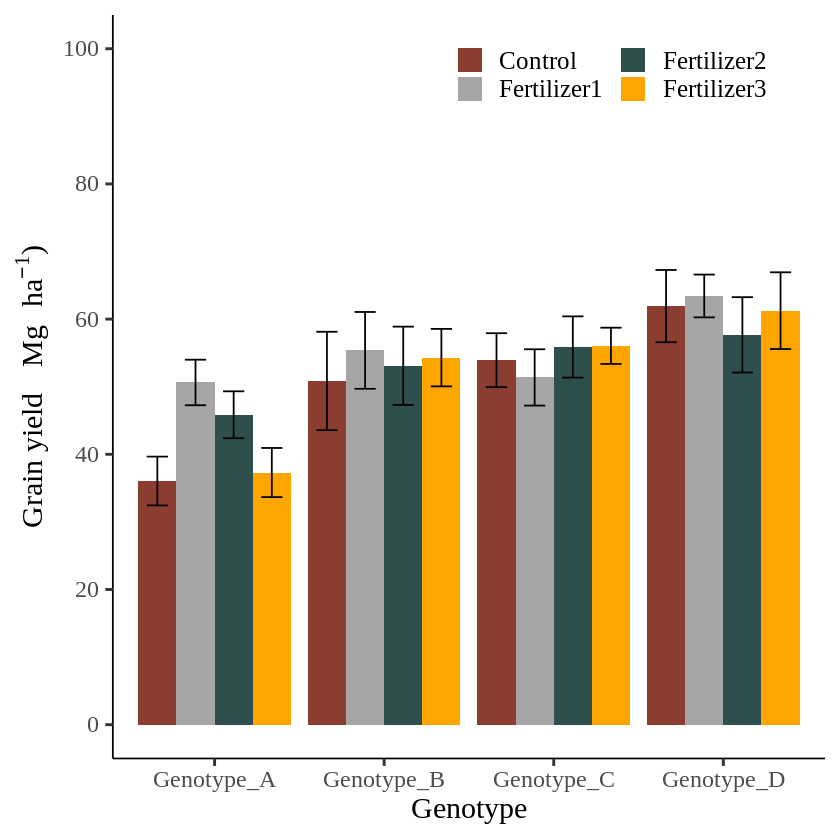

In [ ]:
library(ggplot2)
ggplot(data=dataB, aes(x=Genotype, y=value_Mean, fill=variable))+
  geom_bar(stat="identity",position="dodge", width=0.9, size=1) +
  geom_errorbar(aes(ymin=value_Mean-value_se, ymax=value_Mean+value_se),
                position=position_dodge(0.9), width=0.5) +
  scale_fill_manual(values=c("coral4","grey65","darkslategrey","orange"))+
  scale_y_continuous(breaks=seq(0,100,20), limits = c(0,100)) +
  labs(x="Genotype", y=bquote("Grain yield "~Mg~ha^-1*")")) +
  guides(fill = guide_legend(nrow = 2)) +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position=c(0.7,0.93),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"))